In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

In [2]:
file = Path('../datasets/Ch8/nyc_taxi.csv')
nyc_taxi = pd.read_csv(file, index_col='timestamp',parse_dates=True)
nyc_taxi.index_freq = '30T'

In [3]:
nyc_dates = ['2014-11-01', '2014-11-27', '2014-12-25',
             '2015-01-01', '2015-01-27']

<Axes: title={'center': 'NYC Taxi'}, xlabel='timestamp'>

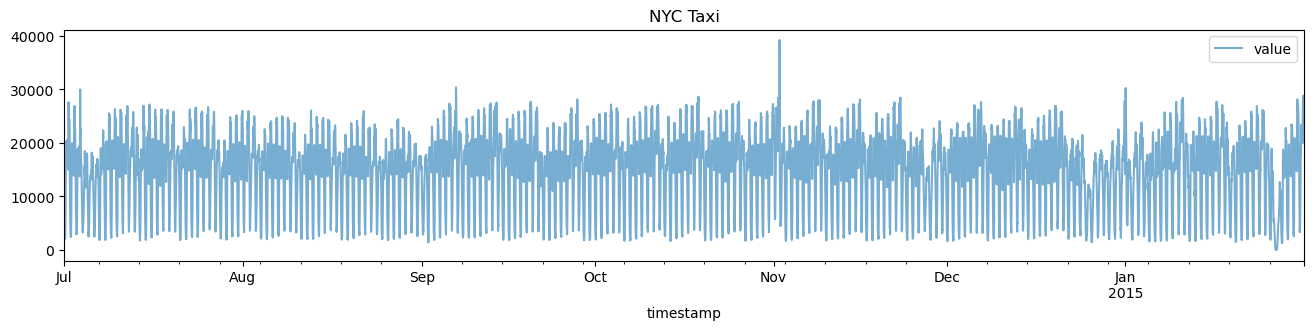

In [5]:
nyc_taxi.plot(title='NYC Taxi', alpha=0.6)

In [24]:
def plot_outliers(outliers, data, method='KNN', 
    halignment='right', valignment='bottom', labels=False):

    ax = data.plot(alpha=0.6)

    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'rx')
            plt.text(i[0], i[1], f'{i[0].date()}',
                horizontalalignment=halignment,
                verticalalignment=valignment)

    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')

    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date')
    plt.ylabel('# of passengers')
    plt.legend(['nyc taxi]','outliers'])
    plt.show()

In [8]:
nyc_taxi.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [9]:
df_downsampled = nyc_taxi.resample('D').mean()
df_downsampled.head()

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667


In [11]:
df_downsampled.index.freq

<Day>

In [12]:
df_downsampled.shape

(215, 1)

In [13]:
df_downsampled = nyc_taxi.resample('3D').sum()
df_downsampled.head()

,value
timestamp,
2014-07-01,2189749
2014-07-04,1658320
2014-07-07,2111672
2014-07-10,2335629
2014-07-13,2139711


In [14]:
df_downsampled.index.freq

<3 * Days>

In [15]:
df_downsampled = nyc_taxi.resample('3B').sum()
df_downsampled.head()

,value
timestamp,
2014-07-01,2189749
2014-07-04,3021425
2014-07-09,3799847
2014-07-14,2174540
2014-07-17,3711232


In [16]:
nyc_taxi.resample('15T').mean().head()

,value
timestamp,
2014-07-01 00:00:00,10844.0
2014-07-01 00:15:00,NaN
2014-07-01 00:30:00,8127.0
2014-07-01 00:45:00,NaN
2014-07-01 01:00:00,6210.0


In [17]:
nyc_taxi.resample('15T').ffill()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:15:00,10844
2014-07-01 00:30:00,8127
2014-07-01 00:45:00,8127
2014-07-01 01:00:00,6210
...,...
2015-01-31 22:30:00,27309
2015-01-31 22:45:00,27309
2015-01-31 23:00:00,26591


In [18]:
nyc_taxi.resample('M').agg(['mean', 'min', 'max', 'median', 'sum'])

value                                
                    mean   min    max   median       sum
timestamp                                               
2014-07-31  14994.084677  1769  29985  16625.5  22311198
2014-08-31  14580.438844  1841  26062  16184.0  21695693
2014-09-30  15623.374306  1431  30373  17244.5  22497659
2014-10-31  16086.851478  1691  28626  17767.5  23937235
2014-11-30  15492.125000  1683  39197  17287.0  22308660
2014-12-31  14813.428763  1459  27804  16587.0  22042382
2015-01-31  14399.790995     8  30236  16061.0  21426889

In [19]:
nyc_taxi.resample('15T').interpolate('linear')

,value
timestamp,
2014-07-01 00:00:00,10844.0
2014-07-01 00:15:00,9485.5
2014-07-01 00:30:00,8127.0
2014-07-01 00:45:00,7168.5
2014-07-01 01:00:00,6210.0
...,...
2015-01-31 22:30:00,27309.0
2015-01-31 22:45:00,26950.0
2015-01-31 23:00:00,26591.0


## Detecting outliers using visualizations

In [27]:
import seaborn as sns

In [20]:
tx = nyc_taxi.resample('D').mean()

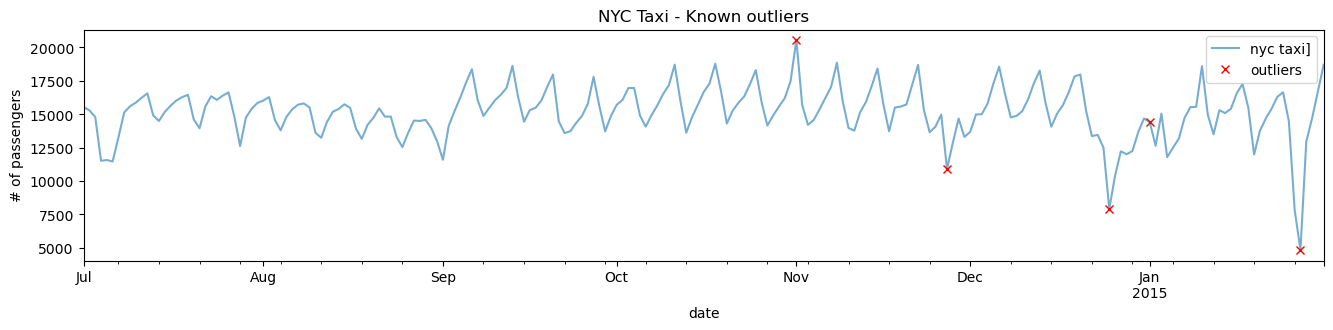

In [25]:
known_outliers = tx.loc[nyc_dates]
plot_outliers(known_outliers, tx, 'Known outliers')

<Axes: ylabel='Count'>

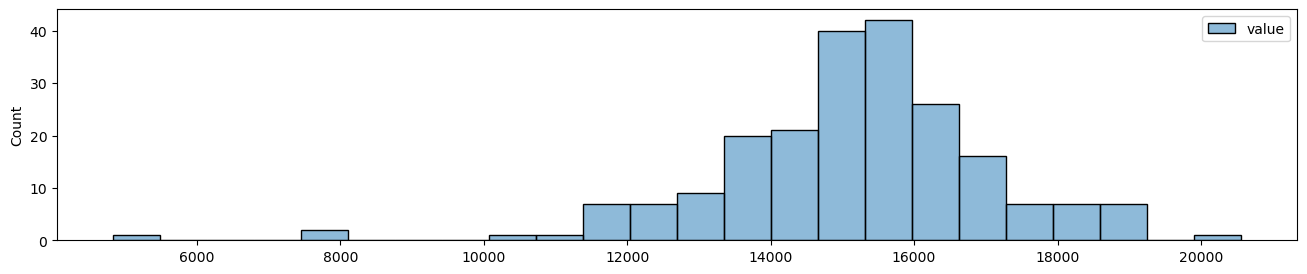

In [28]:
sns.histplot(tx)

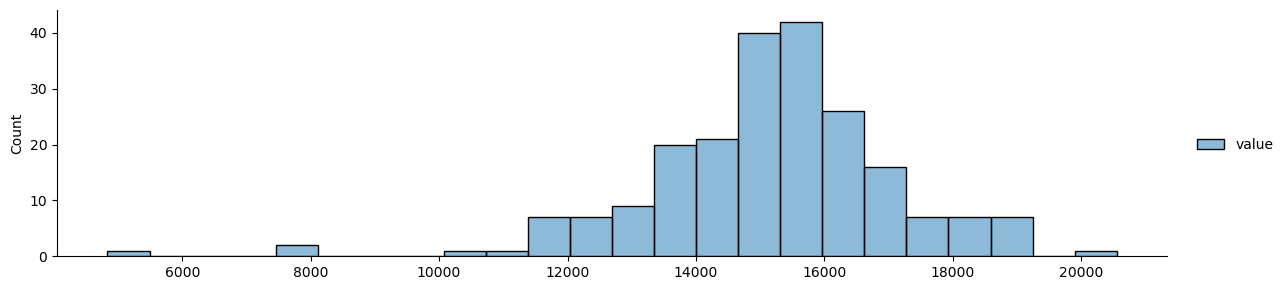

In [32]:
sns.displot(tx, kind='hist', height=3, aspect=4)

<Axes: >

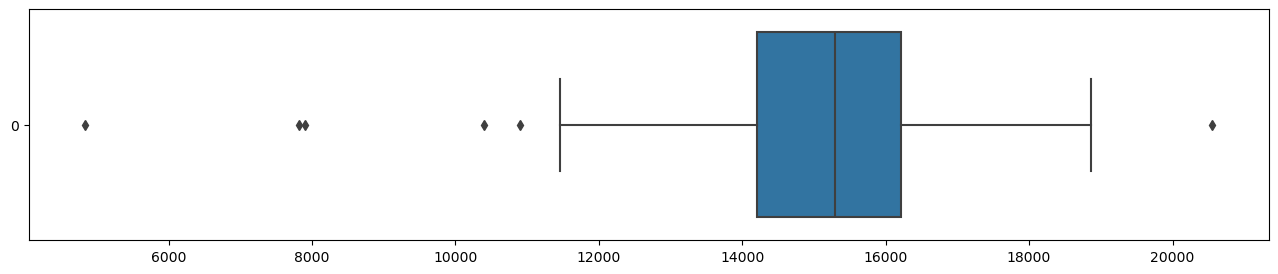

In [34]:
sns.boxplot(tx['value'], orient='h')

<Axes: >

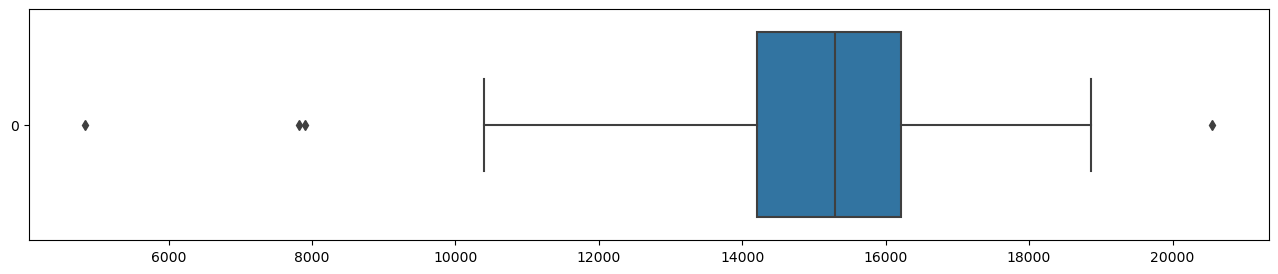

In [36]:
sns.boxplot(tx['value'], whis=2, orient='h')

<Axes: >

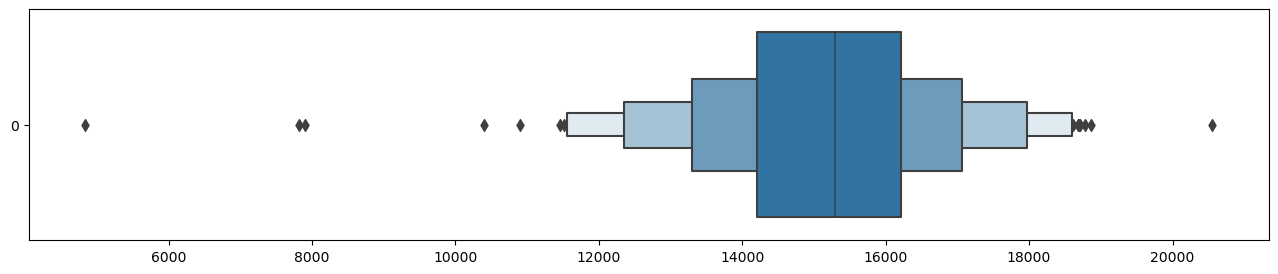

In [38]:
sns.boxenplot(tx['value'], orient='h')

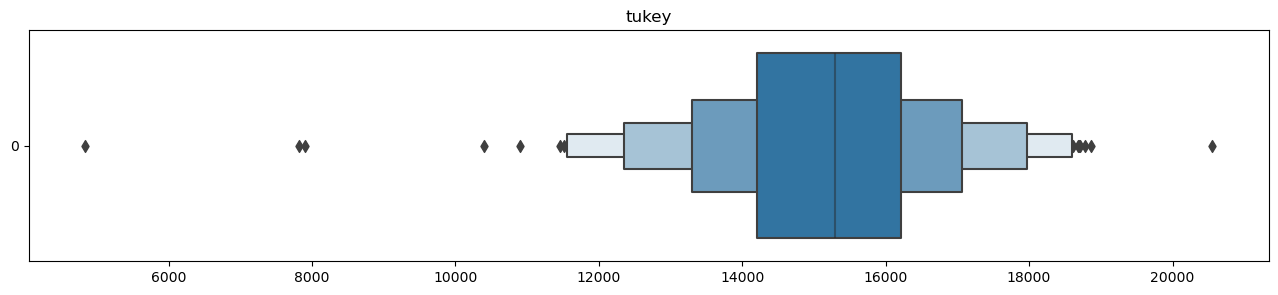

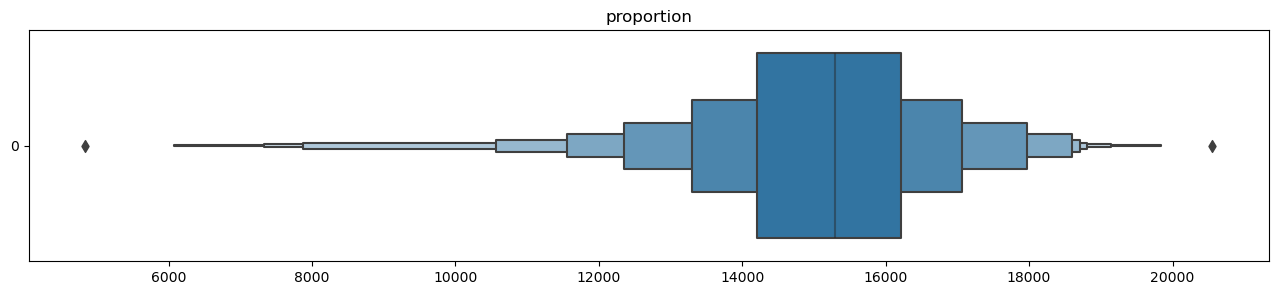

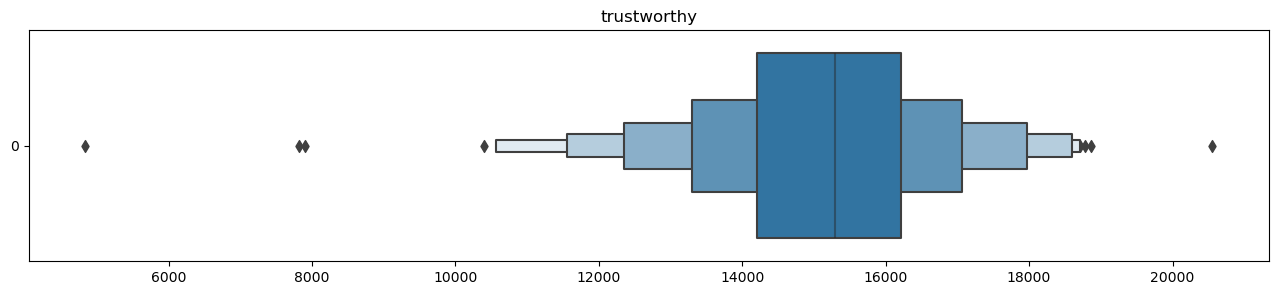

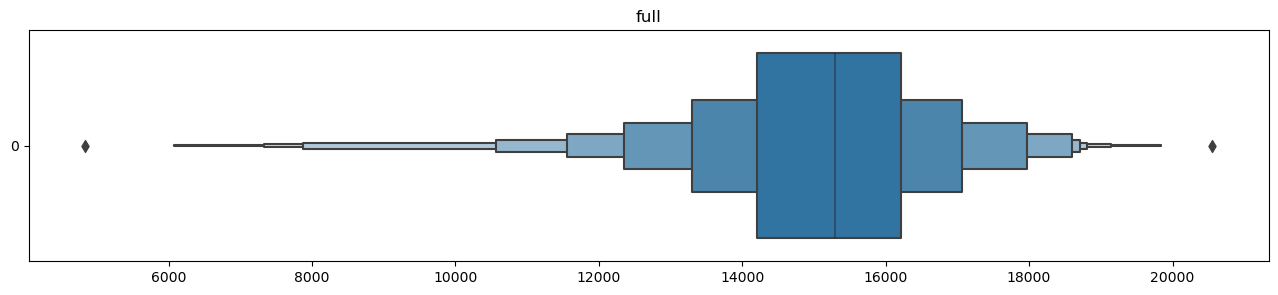

In [42]:
for k in ['tukey', 'proportion', 'trustworthy', 'full']:
    sns.boxenplot(tx['value'], k_depth=k, orient='h')
    plt.title(k)
    plt.show()

<Axes: >

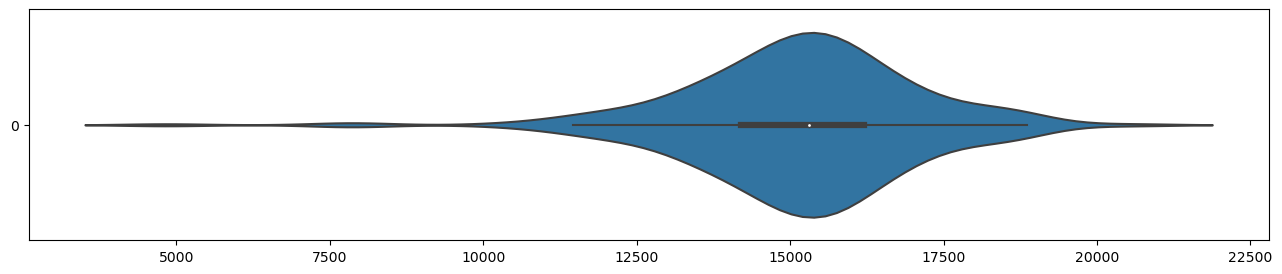

In [44]:
sns.violinplot(tx['value'], orient='h')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

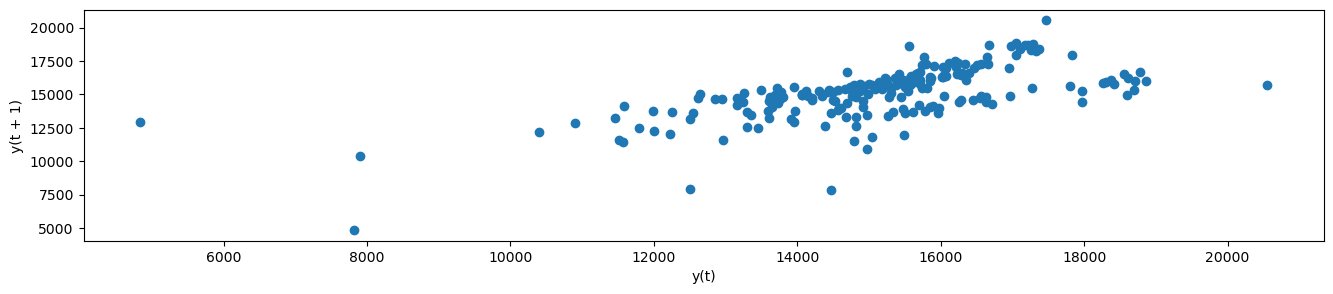

In [45]:
from pandas.plotting import lag_plot
lag_plot(tx)

## Detecting outliers using the Tukey method

In [47]:
percentiles = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]
tx.describe(percentiles=percentiles)

,value
count,215.000000
mean,15137.569380
std,1937.391020
min,4834.541667
0%,4834.541667
5%,11998.181250
10%,13043.854167
25%,14205.197917
50%,15299.937500
75%,16209.427083


In [48]:
percentiles = [0, 5, 10, 25, 50, 75, 90, 95, 100]
np.percentile(tx, percentiles)

array([ 4834.54166667, 11998.18125   , 13043.85416667, 14205.19791667,
       15299.9375    , 16209.42708333, 17279.3       , 18321.61666667,
       20553.5       ])

In [49]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(data.value > upper_fence) | (data.value < lower_fence)]

In [50]:
outliers = iqr_outliers(tx)
outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


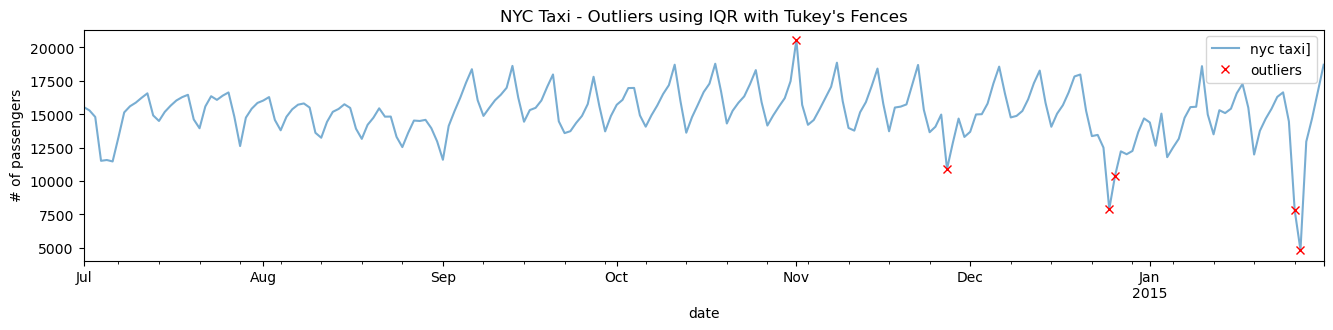

In [51]:
plot_outliers(outliers, tx, 
    "Outliers using IQR with Tukey's Fences")

## Detecting outliers using a z-score

In [53]:
def zscore(df, degree=3):
    data = df.copy()
    data['zscore'] = (data - data.mean()) / data.std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    return outliers['value'], data

In [54]:
threshold = 2.5
outliers, transformed = zscore(tx, threshold)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'zscore'}>]], dtype=object)

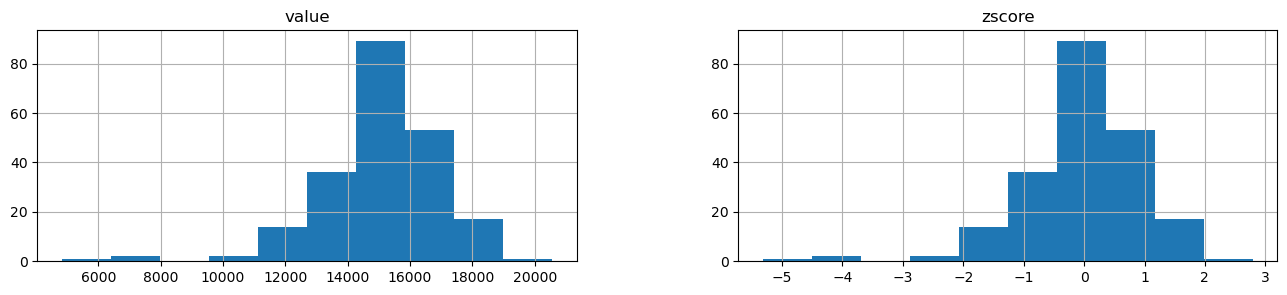

In [55]:
transformed.hist()

In [56]:
outliers

timestamp
2014-11-01    20553.500000
2014-12-25     7902.125000
2015-01-26     7818.979167
2015-01-27     4834.541667
Name: value, dtype: float64

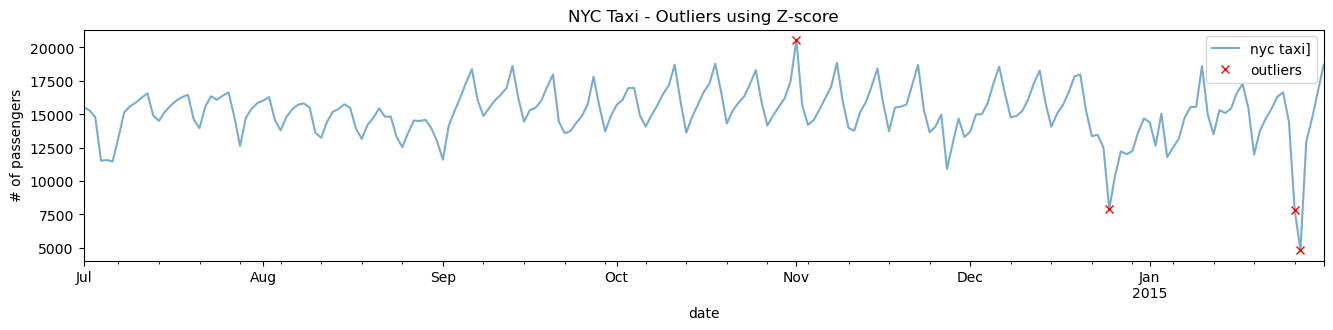

In [57]:
plot_outliers(outliers, tx, "Outliers using Z-score")

In [59]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(8, 8))
    plt.plot(data, 'k^')
    plt.plot([0,n], [d,d],'r--')
    plt.plot([0,n], [-d,-d], 'r--')

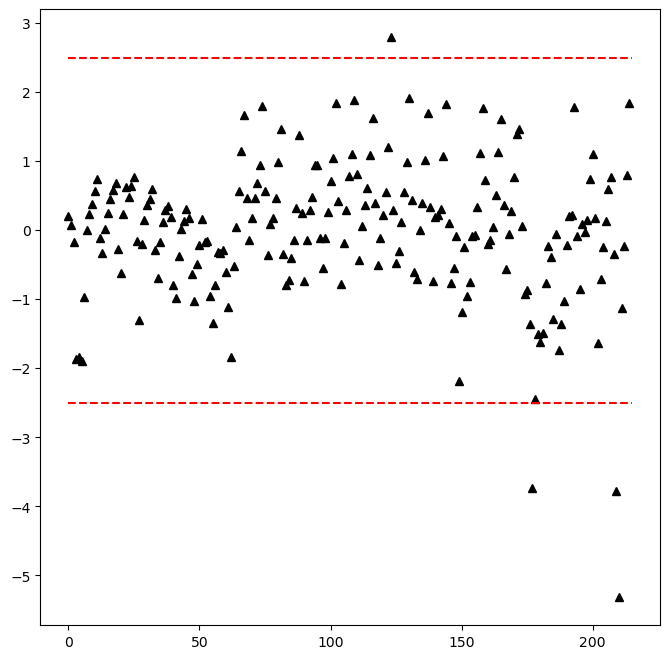

In [61]:
data = transformed['zscore'].values
plot_zscore(data, d=2.5)

In [64]:
from statsmodels.stats.diagnostic import kstest_normal

def test_normal(df):
    t_test, p_value = kstest_normal(df)
    if p_value < 0.05:
        print('Reject null hypothesis. Data is not normal.')
    else:
        print('Fail to reject null hypothesis.  Data is normal.')

In [65]:
test_normal(tx)

Reject null hypothesis. Data is not normal.


## Detecting outliers using a modified z-score
*page 303*